**Project:** Telecom Growth Strategies: Unlocking Customer Lifetime Value Through Smart Segmentation

**Project info:** This project understudies how the energy market is influenced by factors such as demand, supply, and consumption

**Platform:** Amdari

**Website:** www.amdari.io

**Research done by:** Aniekan Charles Ekanem


**1. Importing libraries and loading necessary datasets**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data into python
historical_energy_data = pd.read_csv('primary data/historical_energy_data.csv')
infrastructure_data = pd.read_csv('primary data/infrastructure_data.csv')
market_data = pd.read_csv('primary data/market_data.csv')
regulatory_data = pd.read_csv('primary data/regulatory_data.csv')

**2. Understanding the structure of the data sets**

In [3]:
historical_energy_data.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
0,01/01/2012,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604
1,02/01/2012,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734
2,03/01/2012,Region A,Renewables,81268,36244,0.155890,4418.260676,31523
3,04/01/2012,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205
4,05/01/2012,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548


In [4]:
infrastructure_data.head()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High


In [5]:
market_data.head()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [6]:
regulatory_data.head()

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688


In [7]:
historical_energy_data.info()
historical_energy_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 1000 non-null   object 
 1   Location/Region           1000 non-null   object 
 2   Energy Source             1000 non-null   object 
 3   Energy Demand             1000 non-null   int64  
 4   Energy Consumption (kWh)  1000 non-null   int64  
 5   Energy Price              1000 non-null   float64
 6   Operational Costs         1000 non-null   float64
 7   Energy Production (kWh)   1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49336.335000,24249.533000,0.126752,3002.452425,25502.488000
std,28215.243714,14092.904681,0.042857,1189.898418,14057.976149
min,1015.000000,505.000000,0.050368,1000.630978,850.000000
25%,25812.750000,12017.750000,0.091048,1957.452731,13235.750000
50%,49398.500000,23178.000000,0.126799,2954.748776,24946.000000
75%,73877.500000,36563.000000,0.163701,4095.759662,37653.250000
max,99941.000000,49985.000000,0.199951,4995.000138,49936.000000


In [8]:
infrastructure_data.info()

infrastructure_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date/Time               1000 non-null   object
 1   Infrastructure Status   1000 non-null   object
 2   Maintenance Activities  1000 non-null   object
 3   Technology Limitations  987 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
count,1000,1000,1000,987
unique,1000,3,3,3
top,01/01/2012,Poor,Routine Maintenance,High
freq,1,641,360,776


In [9]:
market_data.info()
market_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date/Time        1000 non-null   object 
 1   Market Price     1000 non-null   float64
 2   Competitor Data  1000 non-null   object 
 3   Market Trends    1000 non-null   object 
 4   Market Demand    1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


,Market Price,Market Demand
count,1000.000000,1000.000000
mean,0.139154,25392.807000
std,0.063492,13980.103619
min,0.030053,836.000000
25%,0.084488,13515.250000
50%,0.138719,24910.500000
75%,0.192279,37102.750000
max,0.249960,49941.000000


In [10]:
regulatory_data.info()
regulatory_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           1000 non-null   object 
 1   Regulatory Changes  1000 non-null   object 
 2   Compliance Status   1000 non-null   object 
 3   Compliance Costs    1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


,Compliance Costs
count,1000.000000
mean,2841.451262
std,1276.101688
min,503.841638
25%,1778.330823
50%,2906.980088
75%,3892.981360
max,4987.232664


**3. Data cleaning**

In [11]:
# The datasets all have the 'Date/Time' column in common.  However, the data type is an object data type and will need to be converted to a proper data datatype
# Also the date format for historical_energy_data and infrastructure_data is "%d/%m/%Y" while that for both market_data and regulatory_data is "%Y-%m-%d"
# this shows non-uniformity and the need to stick with one date format.  For this reason, I will stick with "%Y-%m-%d" date format

date_format1 = "%d/%m/%Y"
date_format2 = "%Y-%m-%d"

# convert to date data type using its current date format
historical_energy_data['Date/Time'] = pd.to_datetime(historical_energy_data['Date/Time'], format = date_format1)
infrastructure_data['Date/Time'] = pd.to_datetime(infrastructure_data['Date/Time'], format = date_format1)
market_data['Date/Time'] = pd.to_datetime(market_data['Date/Time'], format = date_format2)
regulatory_data['Date/Time'] = pd.to_datetime(regulatory_data['Date/Time'], format = date_format2)

# changing the date format for both historical_energy_data and infrastructure_data columns to "%Y-%m-%d" date format
historical_energy_data['Date/Time'] = pd.to_datetime(historical_energy_data['Date/Time'], format = date_format2)
infrastructure_data['Date/Time'] = pd.to_datetime(infrastructure_data['Date/Time'], format = date_format2)

In [12]:
market_data.head(1)

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518


In [13]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date/Time        1000 non-null   datetime64[ns]
 1   Market Price     1000 non-null   float64       
 2   Competitor Data  1000 non-null   object        
 3   Market Trends    1000 non-null   object        
 4   Market Demand    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [14]:
regulatory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           1000 non-null   datetime64[ns]
 1   Regulatory Changes  1000 non-null   object        
 2   Compliance Status   1000 non-null   object        
 3   Compliance Costs    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 31.4+ KB


In [15]:
# # Also, the 'Date/Time' columns are not in the same format. To make it uniform, a date format is chosen e.g %Y-%m-%d.  
# # This means that the date formats for both historical_energy_data and infrastructure_data will be changed to suit that of both market_data and regulatory_data.

# new_date_format = date_format2
# historical_energy_data['Date/Time'] = pd.to_datetime(historical_energy_data['Date/Time'], format = new_date_format)
# infrastructure_data['Date/Time'] = pd.to_datetime(infrastructure_data['Date/Time'], format = new_date_format)

**4. Exploratory Data Analysis**

In [16]:
# Columns to be examined specifically from the datasets are:
# Location/Region and Energy Source from historical_energy_data
# Infrastructure Status, Maintenance Activities, and Technology Limitations from infrastructure_data
# Competitor Data and Market trends from market_data
# Regulatory Changes and Compliance Status from regulatory_data

# grouping all datasets as dataset
datasets = {
"historical_energy_data":historical_energy_data,
"infrastructure_data":infrastructure_data,
"market_data":market_data,
"regulatory_data":regulatory_data
}

# extracting unique values and their counts for categorical columns
categorical_columns = {
"historical_energy_data":["Location/Region","Energy Source"],
"infrastructure_data":["Infrastructure Status","Maintenance Activities","Technology Limitations"],
"market_data":["Competitor Data","Market Trends"],
"regulatory_data":["Regulatory Changes","Compliance Status"]
}

categorical_values_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()

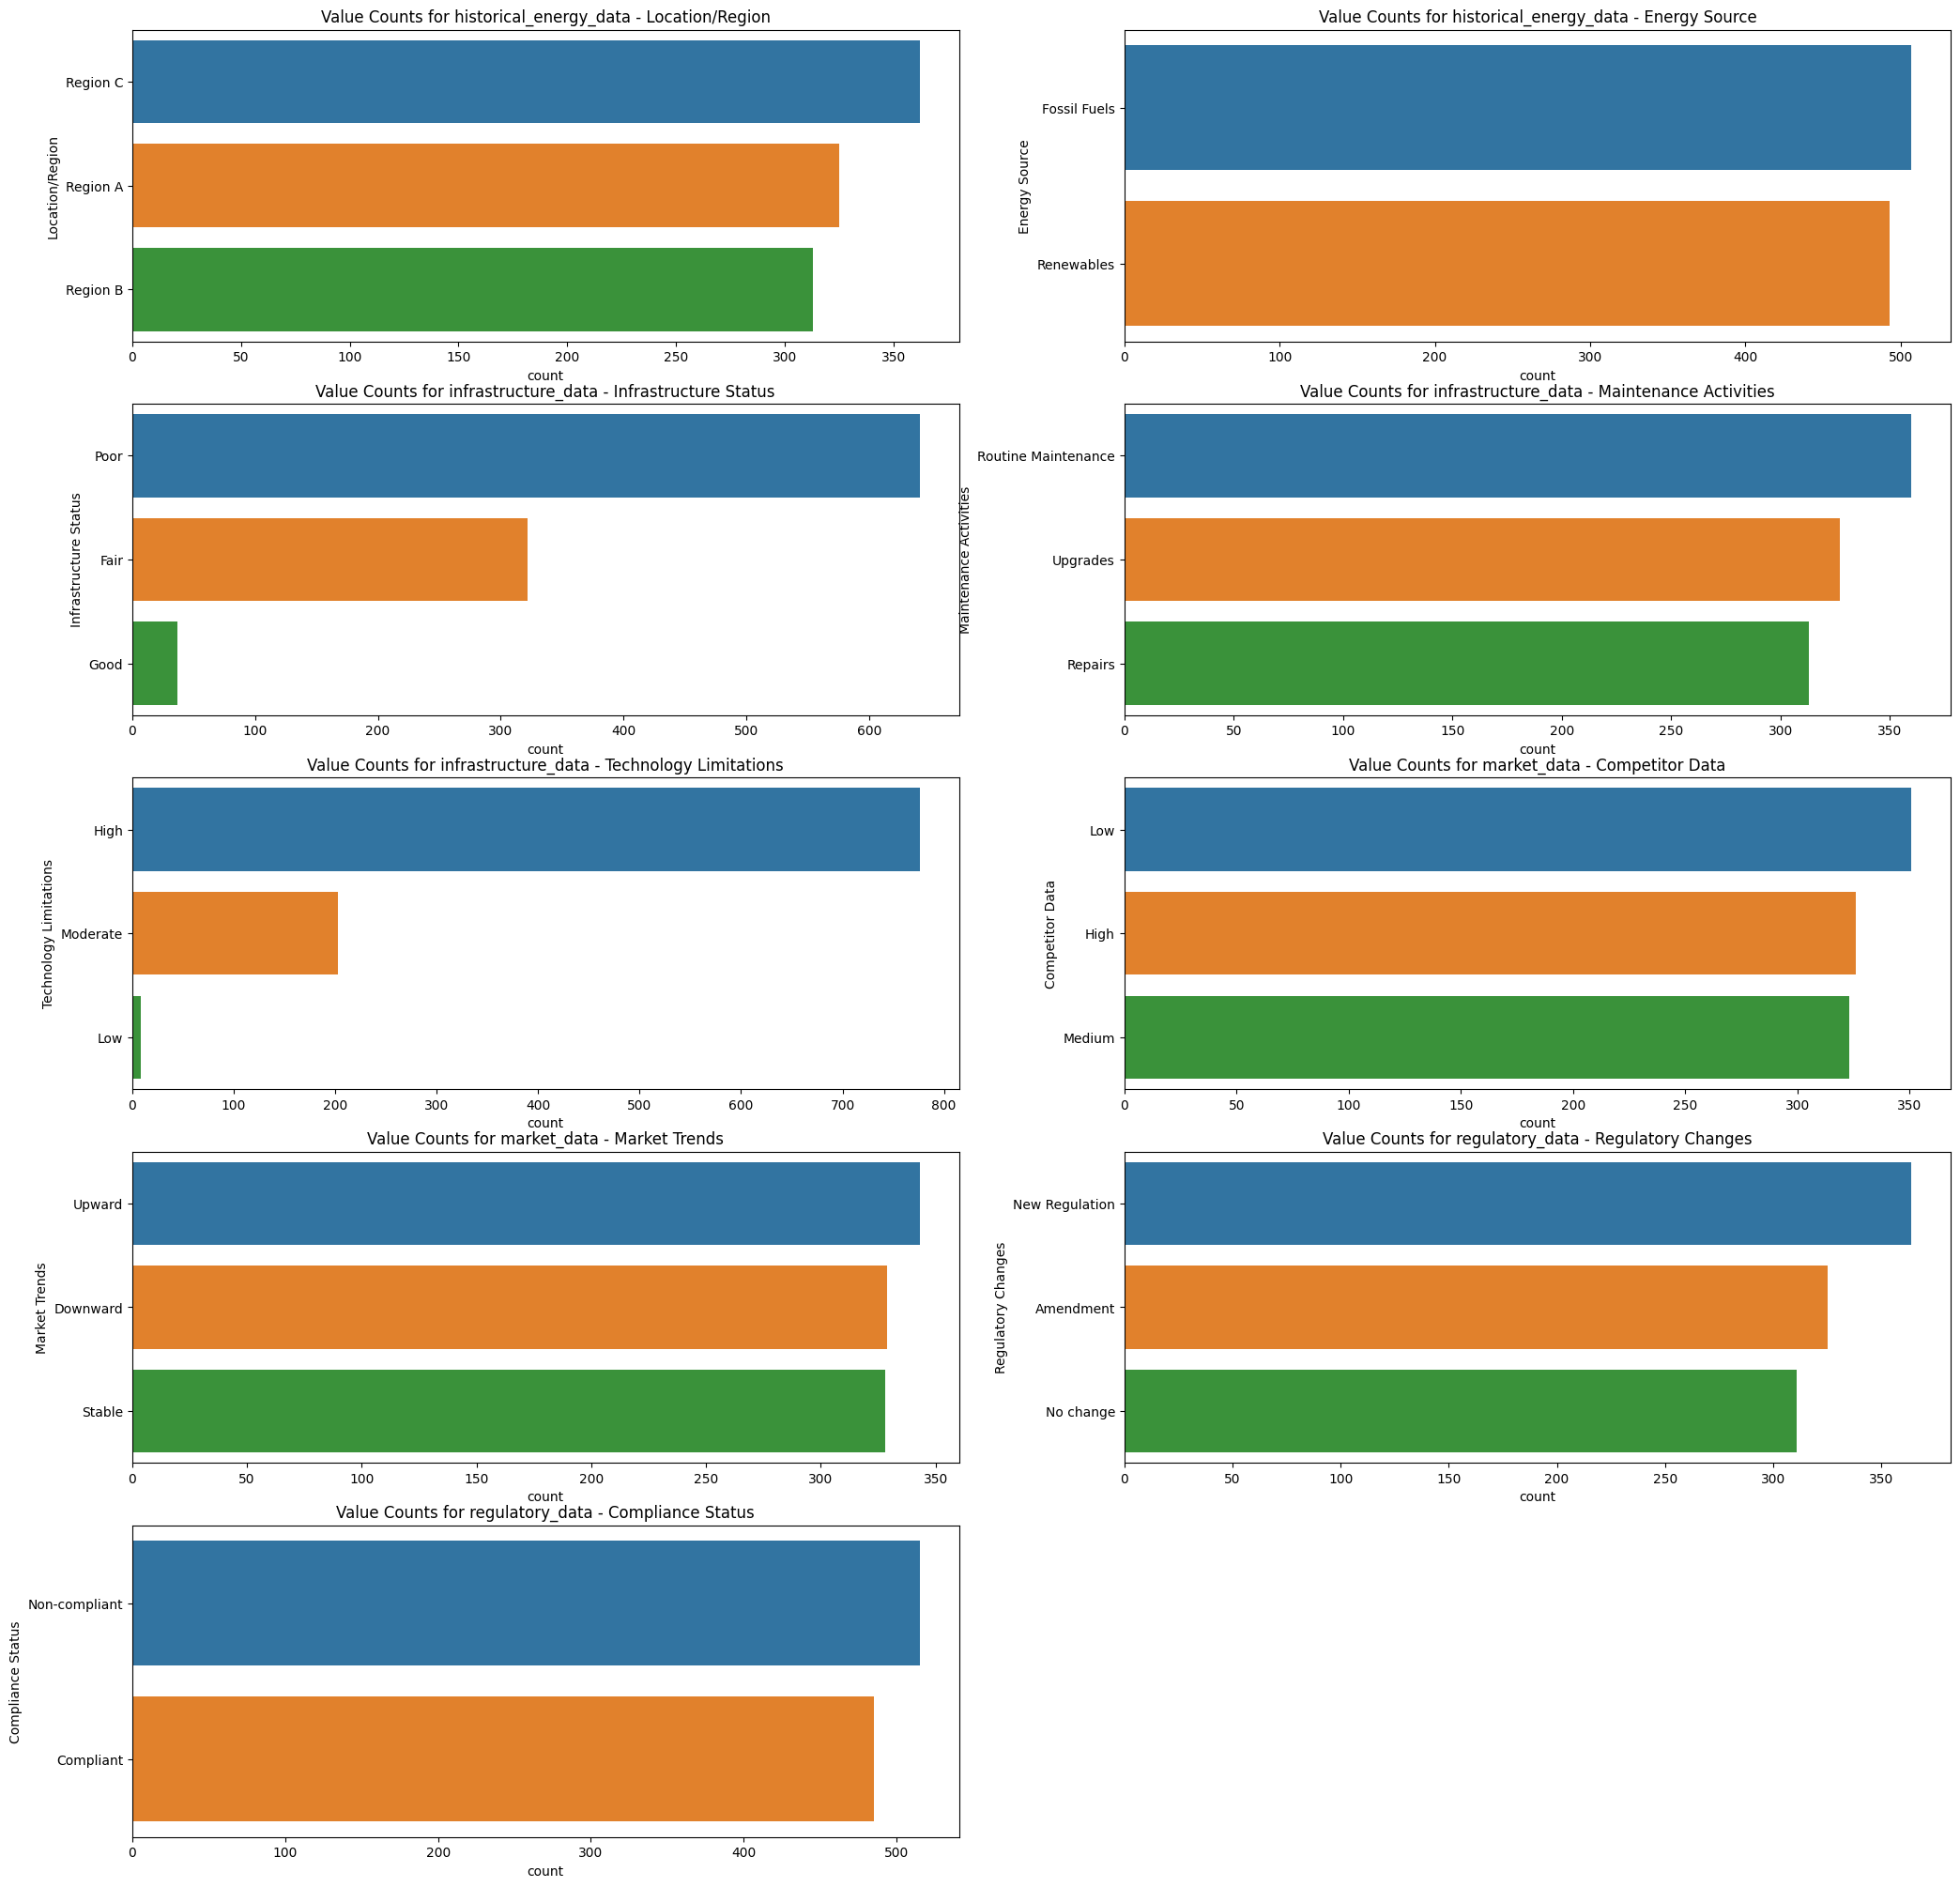

In [17]:
# visualizing
# calculating the number of rows and columns for the subplots
num_rows = (len(categorical_values_counts) + 1) // 2
num_cols = 2

# create a grid of the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize = (25, 25))

# flatten the axes array for easier indexing
axes = axes.flatten()

# iterate through categorical columns and plot them in subplots
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y=counts.index, ax=ax)
    ax.set_title(f"Value Counts for {dataset} - {column}")
    ax.set_xlabel("count")
    ax.set_ylabel(column)
    
# hide any remaining empty subplots
for i in range(len(categorical_values_counts), num_rows * num_cols):
    fig.delaxes(axes[i])

# adjust
plt.tight_layout

plt.show()

**Energy Demand, Production, and Consumption Over Time**
- First I examine the trends in energy demand, production, and consumption from the historical_energy_data dataset
- This will give us insights into fluctuations and potential vulnerabilities in the energy market

/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

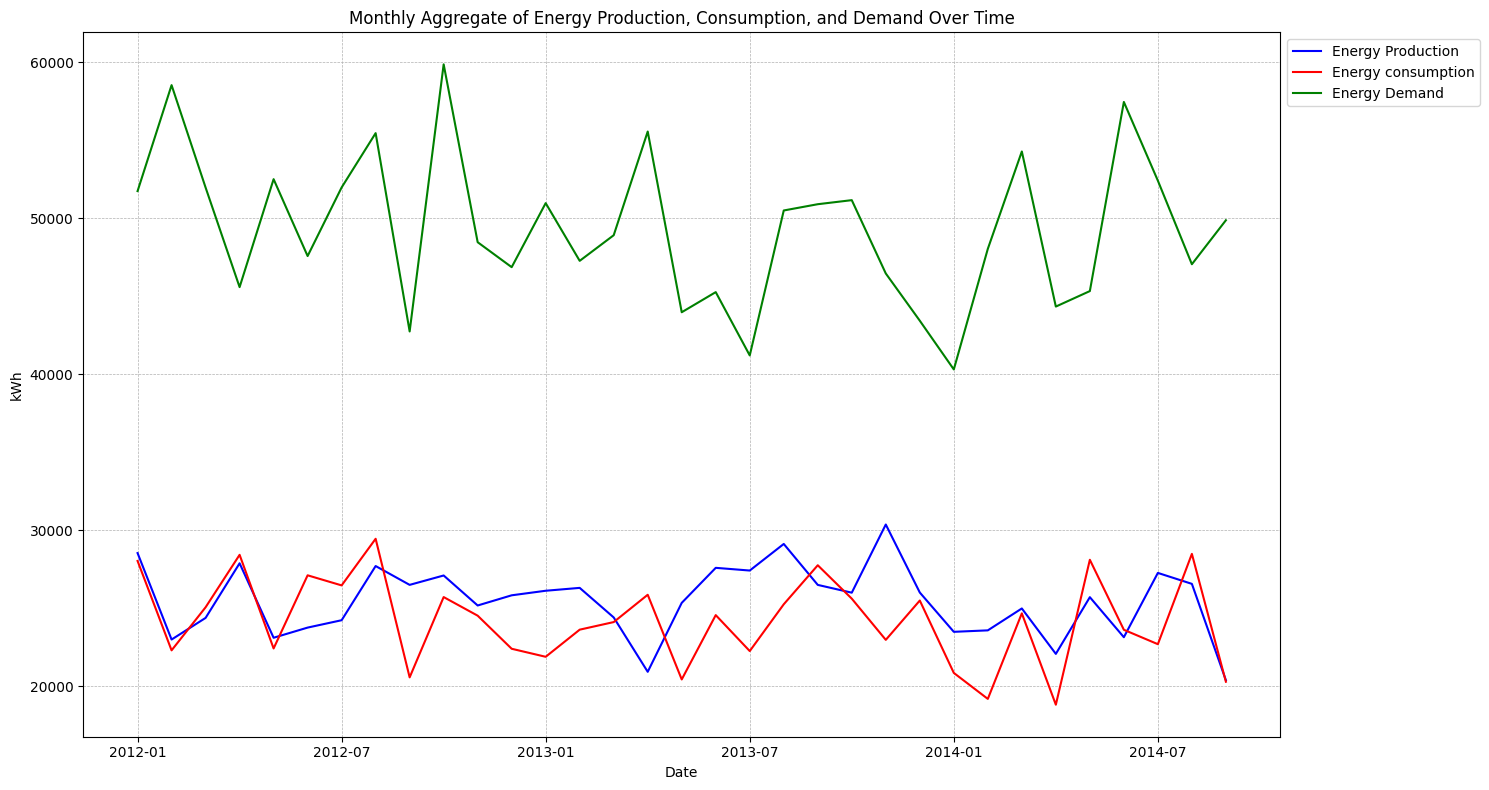

In [18]:
# Extracting the year and the month from the 'Date/Time' column
historical_energy_data['Year'] = historical_energy_data['Date/Time'].dt.year
historical_energy_data['Month'] = historical_energy_data['Date/Time'].dt.month

# Create a new column 'Year-Month' for easy plotting
historical_energy_data['Year-Month'] = historical_energy_data['Date/Time'].dt.to_period('M')

# selecting numerical columns
numerical_columns = ['Energy Production (kWh)', 'Energy Consumption (kWh)', 'Energy Demand']

# Convert selected columns to numeric if needed (as precaution, if not already numeric)
for col in numerical_columns:
    historical_energy_data[col] = pd.to_numeric(historical_energy_data[col], errors='coerce')

# Aggregating data on a monthly basis (Calculate mean of selected numerical columns on a monthly basis)
monthly_data = historical_energy_data.groupby('Year-Month')[numerical_columns].mean()

# setting figsize
plt.figure(figsize=(15, 8))

# plotting
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Production (kWh)', label='Energy Production', color="blue", linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Consumption (kWh)', label='Energy consumption', color="red", linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Demand', label='Energy Demand', color="green", linestyle='-', linewidth=1.5, errorbar=None)  # ci=None is deprecated, so errorbar=None is used

# Setting the title and labels
plt.title('Monthly Aggregate of Energy Production, Consumption, and Demand Over Time')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True, which='both', linestyle="--", linewidth=0.5)

# setting the labels
labels = monthly_data.index.astype(str).tolist()
n = 6
plt.xticks(labels[::n], rotation=360)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

In [19]:
monthly_data

,Energy Production (kWh),Energy Consumption (kWh),Energy Demand
Year-Month,,,
2012-01,28536.064516,28030.741935,51746.612903
2012-02,22991.448276,22298.310345,58542.068966
2012-03,24378.741935,25060.096774,51976.903226
2012-04,27881.266667,28423.733333,45590.000000
2012-05,23105.903226,22419.709677,52512.258065
2012-06,23757.200000,27110.133333,47582.700000
2012-07,24230.225806,26462.903226,51981.612903
2012-08,27704.741935,29452.677419,55464.225806
2012-09,26497.000000,20565.800000,42747.233333


**Market Price and Energy Price over Time**
- To understand the pricing dynamics andits relation to market trends
- Visualization of the Market Price from the market_data dataset alongside the Energy Price from the historical_energy_data dataset over time

/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

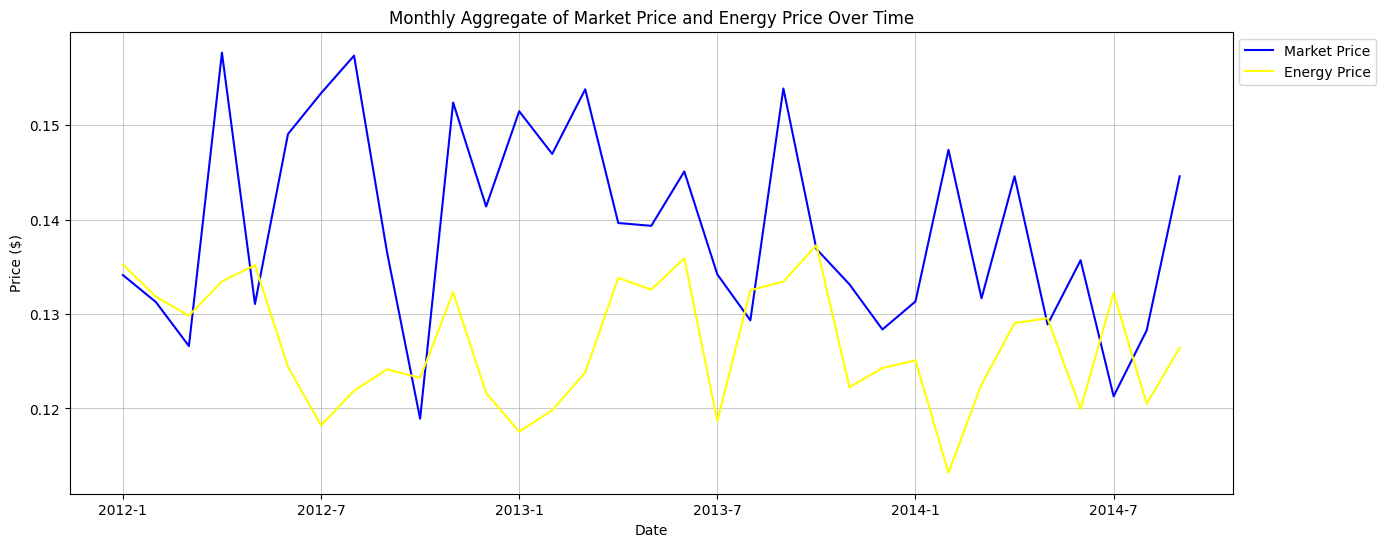

In [20]:
# Merging historical_energy_data and market_data on Date/Time for combined analysis
merged_data = pd.merge(historical_energy_data, market_data, on="Date/Time", how="inner")

# Setting 'Date/Time' as the index of the DataFrame for aggregation
merged_data['Year'] = merged_data['Date/Time'].dt.year
merged_data['Month'] = merged_data['Date/Time'].dt.month

# Aggregating data on a monthly basis
monthly_merged_data = merged_data.groupby(['Year', 'Month'])[['Market Price', 'Energy Price']].mean()

# Create a new 'Year-Month' column for plotting
monthly_merged_data['Year-Month'] = monthly_merged_data.index.get_level_values(0).astype(str)+ '-' + monthly_merged_data.index.get_level_values(1).astype(str)

plt.figure(figsize=(15, 6))

sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Market Price', label='Market Price', color="blue", linestyle='-', linewidth=1.5, errorbar=None)
sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Energy Price', label='Energy Price', color="yellow", linestyle='-', linewidth=1.5, errorbar=None)

plt.title('Monthly Aggregate of Market Price and Energy Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
labels = monthly_merged_data['Year-Month'].tolist()
n = 6
plt.xticks(labels[::n], rotation=360)
plt.show()

In [21]:
merged_data

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Year,Month,Year-Month,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,2012,1,2012-01,0.167891,High,Upward,13518
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,2012,1,2012-01,0.151762,Medium,Upward,2115
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523,2012,1,2012-01,0.241443,High,Stable,22353
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205,2012,1,2012-01,0.071104,Low,Downward,25482
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548,2012,1,2012-01,0.107281,High,Stable,20264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014-09-22,Region C,Renewables,10854,14036,0.178223,1630.754688,8119,2014,9,2014-09,0.232041,Low,Upward,14183
996,2014-09-23,Region B,Renewables,53076,2100,0.107236,3065.359275,33949,2014,9,2014-09,0.201107,Low,Downward,6048
997,2014-09-24,Region C,Fossil Fuels,57950,6200,0.161005,4171.378135,48855,2014,9,2014-09,0.244855,High,Upward,36997
998,2014-09-25,Region B,Renewables,18349,39339,0.144155,2730.569922,2645,2014,9,2014-09,0.077592,Low,Stable,27240


**Energy Demand and Energy Price Correlation**
- The aim here is to check if the energy demand is influenced by the current energy price

In [22]:
# # Merge historical_energy_data and market_data on Data/Time
# merged_data = pd.merge(historical_energy_data, market_data, on="Date/Time", how="inner")

# correlation_energy_price = merged_data['Energy Demand'].corr(merged_data['Energy Price'])
# correlation_market_price = merged_data['Market Demand'].corr(merged_data['Market Price'])

# print(correlation_energy_price, correlation_market_price)

In [23]:
# To find out if there is a correlation between energy price and energy demand as well between market price and market demand
correlation_energy_price_demand = historical_energy_data['Energy Demand'].corr(historical_energy_data['Energy Price'])
correlation_market_price_demand = market_data['Market Demand'].corr(market_data['Market Price'])

In [24]:
correlation_energy_price_demand

-0.005361840768503415

In [25]:
correlation_market_price_demand

0.029802302148288523

**Infrastructure Status and Technology Limitations**

- To understand the state of infrastructure and technology over time.
- Visualizing the frequency of various infrstructure status values and the distribution of technology limitations from the infrastructure_data dataset

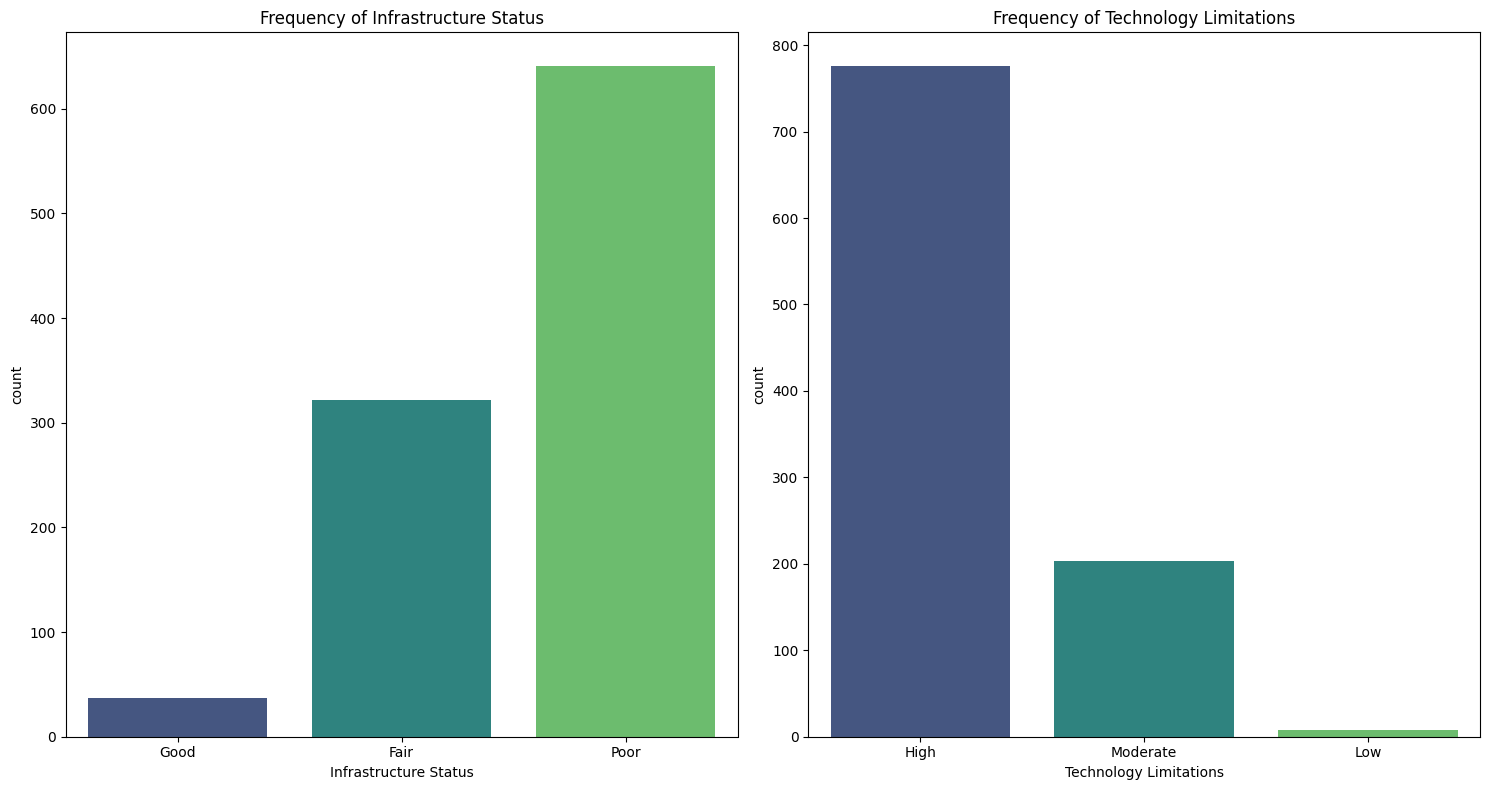

In [26]:
# setting up the figsize and axes
fig, axes = plt.subplots(1,2,figsize=(15,8))

# plotting the frequency of infrstructure status
sns.countplot(data=infrastructure_data, x='Infrastructure Status', ax=axes[0],order=['Good','Fair','Poor'],palette='viridis')
axes[0].set_title('Frequency of Infrastructure Status')
axes[0].set_xlabel('Infrastructure Status')
axes[0].set_ylabel('count')

# plotting the frequency of technology limitations
sns.countplot(data=infrastructure_data, x='Technology Limitations', ax=axes[1],palette='viridis')
axes[1].set_title('Frequency of Technology Limitations')
axes[1].set_xlabel('Technology Limitations')
axes[1].set_ylabel('count')

plt.tight_layout()
plt.show()

Even when the company has managed to meet up the demands based on their capacity, they are faced with poor infrastructural facilities as well as limitations in technology.  this suggests the need for the company to improve on their infrastructures with frequent upgrade to up to date technologies, replacing outdated or technologies that appears faulty

**Studying the relationship with infrastructure status and technology limitation**

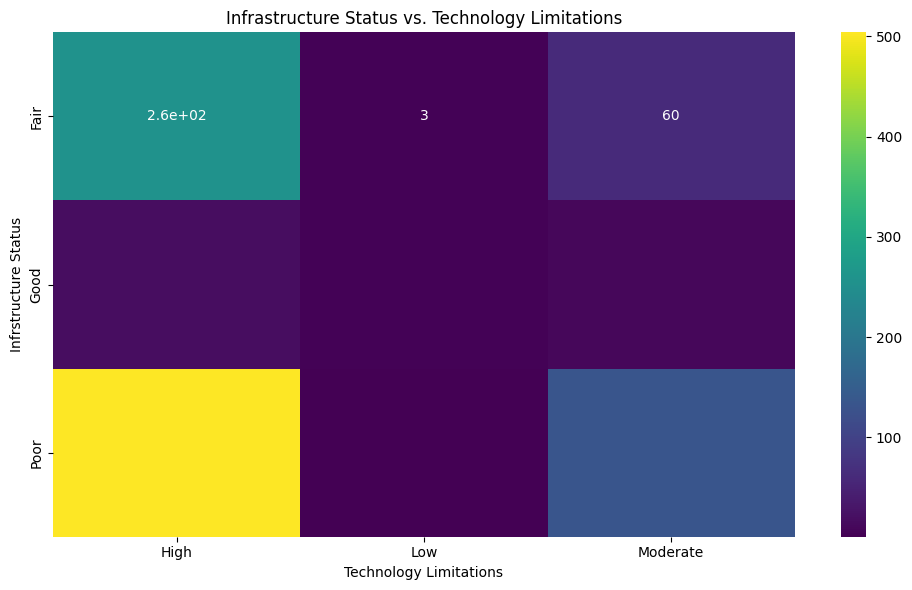

In [27]:
ct=pd.crosstab(infrastructure_data['Infrastructure Status'], infrastructure_data['Technology Limitations'])
plt.figure(figsize=(10,6))

sns.heatmap(ct, annot=True,cmap='viridis')
plt.title('Infrastructure Status vs. Technology Limitations')
plt.xlabel('Technology Limitations')
plt.ylabel('Infrstructure Status')

plt.tight_layout()
plt.show()

From the heat map, it was discovered that there is a strong correlation between poor infrastructure status and high technology limitations, which suggests that for their infrastructure status to be poor, it could be due to high technology limitations.  This consolidates the point that their infrastructure is very poor and needs urgent upgrades and proactive maintenance in the long run. Poor infrastructure could also be as a result of reactive maintenance which limits the capacity of devices in operation.  So whatever they are using for their technology needs to be replaced with immediate effect to meet up with demands and ensure quality service to customers.

**To find out if the poor infrastructure is the reason for company's failure to meet up with the demands**

**Correlation between poor infrastructure status and high technology limitations and the energy production**

In [28]:
infrastructure_data['Poor_Infrastructure']=infrastructure_data['Infrastructure Status'].apply(lambda x: 1 if x == 'Poor' else 0)
infrastructure_data['High_Tech_Limitations']=infrastructure_data['Technology Limitations'].apply(lambda x: 1 if x == 'High' else 0)

infrastructure_data['Combined']=infrastructure_data['Poor_Infrastructure']*infrastructure_data['High_Tech_Limitations']

merged_data = pd.merge(historical_energy_data, infrastructure_data, on="Date/Time", how="inner")

correlation_coefficient = merged_data['Energy Production (kWh)'].corr(merged_data['Combined'])

In [29]:
correlation_coefficient

-0.015877155348918308

The above is a weak negative correlation which still suggests the reason for low energy production is due to poor infrastructure and high technology limitations as there could be a slight decrease in energy production when both status (infrastructure and technology limitations) are poor

In [30]:
infrastructure_data

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations,Poor_Infrastructure,High_Tech_Limitations,Combined
0,2012-01-01,Poor,Repairs,High,1,1,1
1,2012-01-02,Poor,Upgrades,High,1,1,1
2,2012-01-03,Fair,Upgrades,High,0,1,0
3,2012-01-04,Poor,Repairs,High,1,1,1
4,2012-01-05,Poor,Repairs,High,1,1,1
...,...,...,...,...,...,...,...
995,2014-09-22,Fair,Repairs,Moderate,0,0,0
996,2014-09-23,Poor,Upgrades,NaN,1,0,0
997,2014-09-24,Good,Routine Maintenance,Moderate,0,0,0
998,2014-09-25,Fair,Upgrades,Low,0,0,0


**Regulatory Changes and Compliance Costs**
- To understand the impact of regulatory changes
- We'll visualize the frequency of various regulatory changes and the distribution of complaince costs associated with these changes from regulatory_data dataset

/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


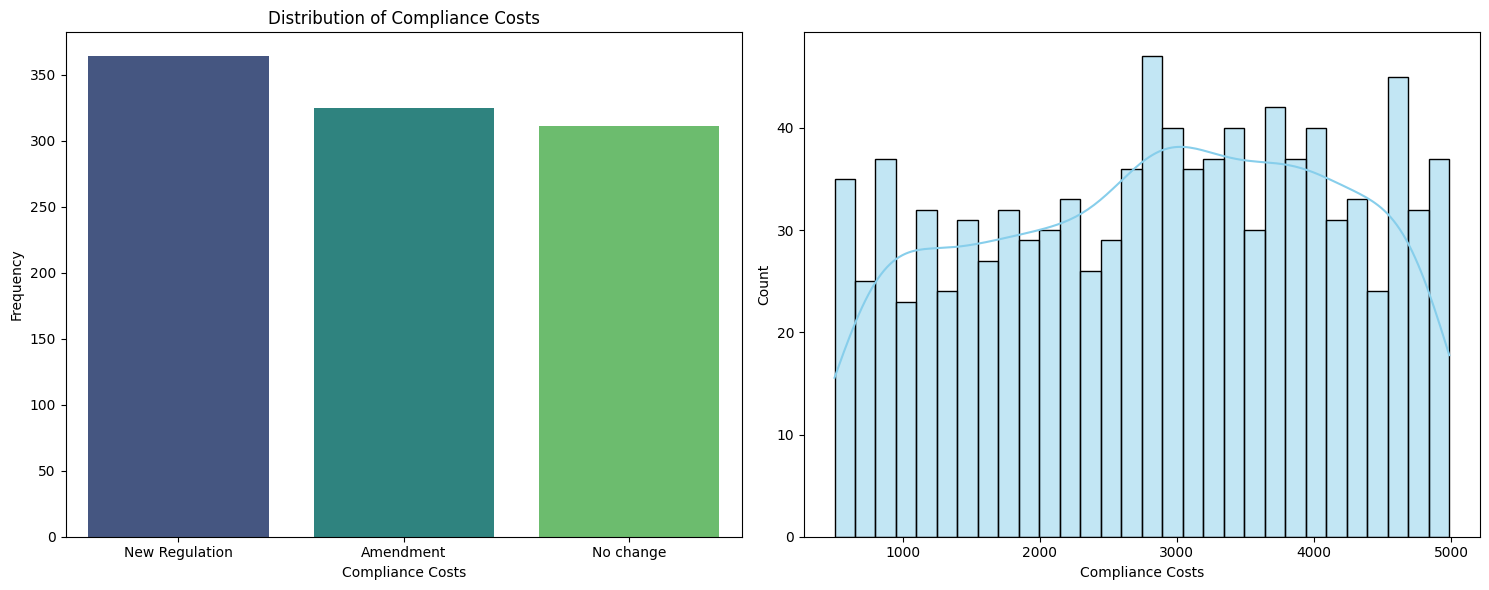

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

sns.countplot(data=regulatory_data, x="Regulatory Changes", ax=ax1, palette='viridis')
ax1.set_title('Frequency of Regulatory Changes')
ax1.set_xlabel('Regulatory Changes')
ax1.set_ylabel('Count')

sns.histplot(data=regulatory_data, x='Compliance Costs', ax=ax2,bins=30, kde=True, color='skyblue')
ax1.set_title('Distribution of Compliance Costs')
ax1.set_xlabel('Compliance Costs')
ax1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

For the frequency of regulatory changes, the bar chart shows that the company faces frequent introduction of new regulatory changes followed by amendment of previous regulations which could in turn affect the occupational challenges and compliance costs and from the normal distribution some regulatory compliance may be more expensive to adhere to than others hence a high compliance cost can impact the business for profitability and requires strategic planning for cost management.

**Impact of Regulatory Changes and Operational Costs on Revenue**
- We'll visualize the relationship between regulatory changes and the associated compliance costs as well as the operational costs to the revenue generated from the company
- Revenue = Energy Consumption*Energy price
- This will provide insights into the financial implications of regulatory changes cost and operational cost for Energix Enterprise

/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


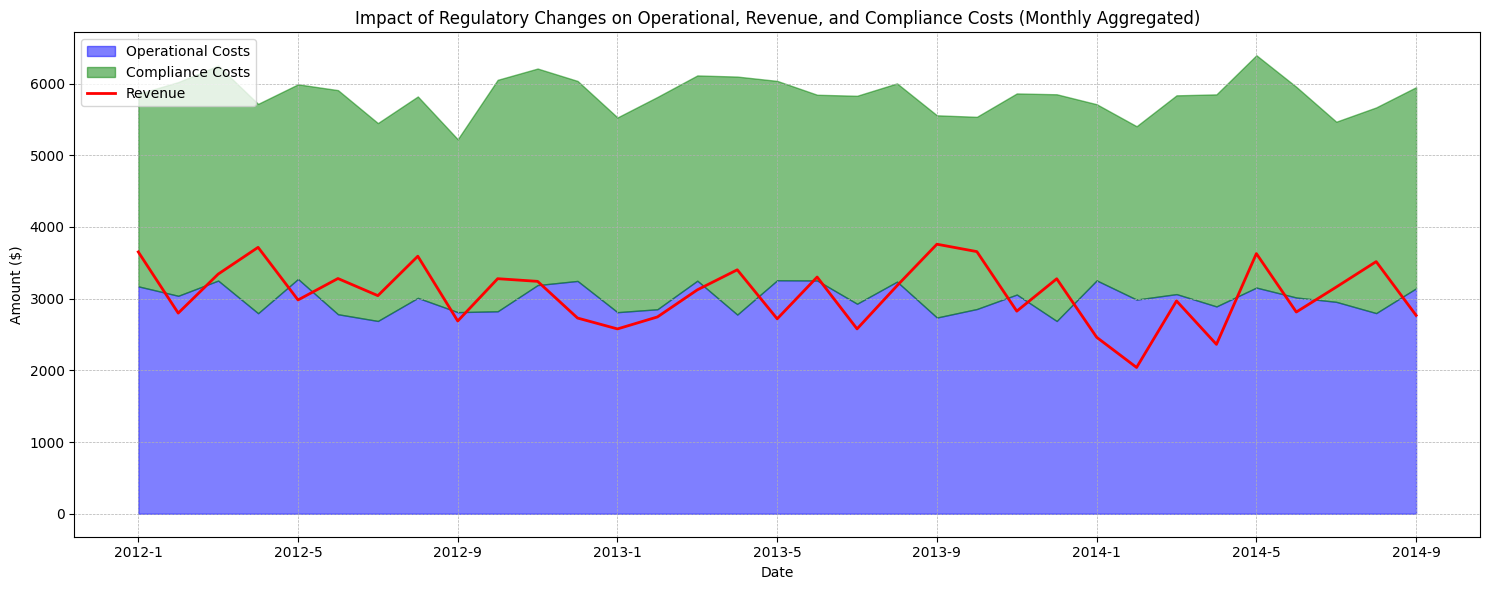

In [32]:
historical_energy_data['Revenue']=historical_energy_data['Energy Price']*historical_energy_data['Energy Consumption (kWh)']

merged_regulatory_data=pd.merge(historical_energy_data, regulatory_data, on="Date/Time", how="inner")

merged_regulatory_data['Year'] = merged_regulatory_data['Date/Time'].dt.year
merged_regulatory_data['Month'] = merged_regulatory_data['Date/Time'].dt.month

monthly_aggregated_data = merged_regulatory_data.groupby(['Year','Month'])[['Operational Costs', 'Compliance Costs', 'Revenue']].mean().reset_index()

monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

plt.figure(figsize=(15, 6))

plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'], color='blue', label='Operational Costs',alpha=0.5)
plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'],monthly_aggregated_data['Operational Costs']+monthly_aggregated_data['Compliance Costs'], color='green', label='Compliance Costs', alpha=0.5)

sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Revenue', label='Revenue', color='red', linewidth=2)

plt.title('Impact of Regulatory Changes on Operational, Revenue, and Compliance Costs (Monthly Aggregated)')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend(loc='upper left')
plt.grid(True, which='both',linestyle='--',linewidth=0.5)
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.show()

From the graph above we noticed that the company struggles with their current revenue to meet up with their costs.  This indicates the business is running at a loss and requires drastic measures to mitigate these financial struggles by working on pricing strategies with customers and regulatory bodies.

**Analyzing Competition from Renewable Energy Providers**
- To understand the competition from renewable energy providers and its impact on Energix Enterprise.  We'll analyze the Energy Source column from the historical_energy_data dataset
- We'll visualize the trends in energy production based on the energy source (Fossil Fuels Vs Renewables) over time.  This will give us insight into how the production from renewables has evolved and potentially affected the company's market share

/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/aniekan/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:

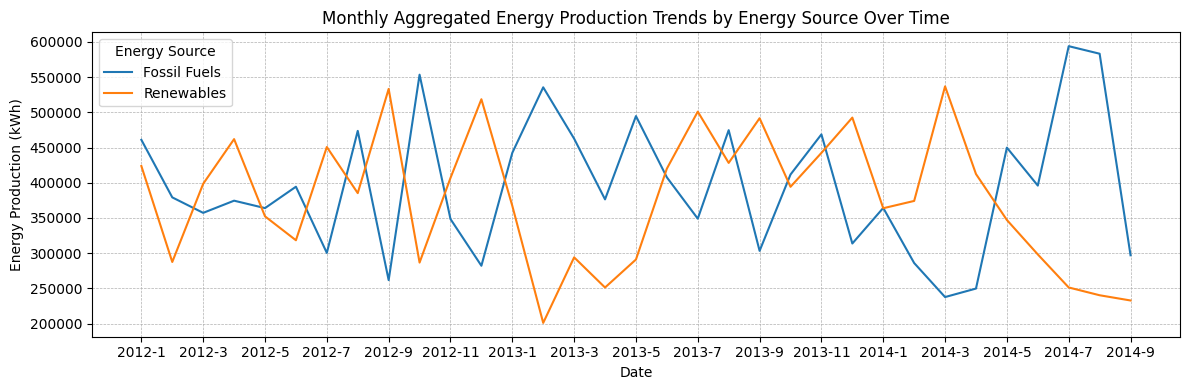

In [33]:
historical_energy_data['Year'] = historical_energy_data['Date/Time'].dt.year
historical_energy_data['Month'] = historical_energy_data['Date/Time'].dt.month


monthly_aggregated_data = historical_energy_data.groupby(['Year','Month','Energy Source'])['Energy Production (kWh)'].sum().reset_index()

monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

plt.figure(figsize=(12,4))

sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Energy Production (kWh)', hue='Energy Source', errorbar=None)

plt.title('Monthly Aggregated Energy Production Trends by Energy Source Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.legend(title='Energy Source')

plt.grid(True, which='both',linestyle='--',linewidth=0.5)
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.show()

**General Insights**
- Cost effects from the energy generational method: From the study above, I have discovered that the company relies more on fossil fuels than renewables which could be a resulting factor in high operational costs.  The infrastructure needed to use fossil fuels to generate energy could be expensive to acquire, operate, and manage. It can even disrupt the natural ecosystem due to the environmental effects of using fossil fuels, and this can cause societal conflicts if the community where these fossil fuels are derived from feels threatened facing environmental hardships.
- General market operational challenges: From the visual, it appears there is a high demand for energy from prospective consumers which the company has failed to meet while it attends to its subscriber base as it provides energy services to these subscribers in direct proportion.  Hence there seems to be an untapped market to serve and profit from which the company should take advantage of.
- Operational costs and profitability: The company faces some financial challenges due to conflict costs among its operational costs, compliance costs, and revenue.  Internally, the visual shows that there is a positive gap between the operational costs and revenue but not too great yet shows the company still makes a profit.  However, externally, the compliance costs conflict with the company's revenue showing that the company may have struggled financially to keep up with the compliance cost as well as settle its internal operational costs.


**Recommendations**
- Implementing mad marketing strategies: The company should adopt marketing strategies to access the market in need of energy services and use innovative means to serve these markets according to their budgets.
- Implementing pricing strategy: As we have seen the financial conflicts amongst the company's operational costs, compliance costs, and revenue.  The problem here lies in the high compliance costs faced by the company which it has to work on by finding ways to influence the regulatory bodies concerning the high costs of compliance for the sake of an effective, easy, and smooth business environment.
- Revamping infrastructures:  The visuals have shown that technological limitations have been influenced by infrastructure status.  For this reason, there is a need for the company to work on improving its infrastructure to command better technological innovations to better serve its customers and be more profitable.
- Embracing a cost-effective means of energy generation:  To help conserve the environment, the company should embrace the use of renewables and further seek to use improved technology if using fossil fuels such that the environment is not affected negatively.